In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [29]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\Company_Data.csv")

In [30]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 
data['US']= label_encoder.fit_transform(data['US'])

In [31]:
bins=[0,6,13,17]
name=["low","medium","high"]
data["sales_out"]=pd.cut(data.Sales,bins,labels=name)
data.head()
# Converted Sales into three categories 0 to 6 as low, 6 to 13 as medium , 13 to 17 as high

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_out
0,9.50,138,73,11,276,120,0,42,17,1,1,medium
1,11.22,111,48,16,260,83,1,65,10,1,1,medium
2,10.06,113,35,10,269,80,2,59,12,1,1,medium
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [32]:
data.drop("Sales",axis=1,inplace=True)

In [33]:
data['sales_out']= label_encoder.fit_transform(data['sales_out'].astype(str))
data.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_out
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [34]:
x=data.iloc[:,0:10]
y=data.iloc[:,10]

In [35]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [36]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    2
396    2
397    2
398    1
399    2
Name: sales_out, Length: 400, dtype: int32

In [37]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

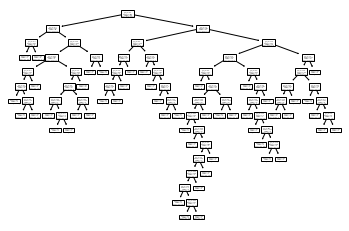

In [39]:
#PLot the decision tree
tree.plot_tree(model);


In [40]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    54
1    23
0     3
dtype: int64

In [41]:
preds

array([2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1])

In [42]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
sales_out,,,
0,1,0,2
1,0,17,10
2,2,6,42


In [43]:
# Accuracy 
np.mean(preds==y_test)

0.75

Accuracy of model is 75%

### Building Decision Tree Classifier (CART) using Gini Criteria

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.75

Accuracy of model is 75% using Gini index